# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [15]:
paysim= pd.read_csv(r"C:\Users\osile\Downloads\paysim.csv")
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
#data.step.value_counts()

In [17]:
paysim.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

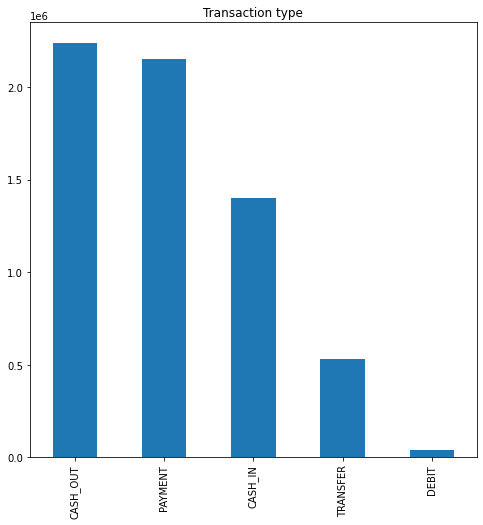

In [18]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
paysim.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

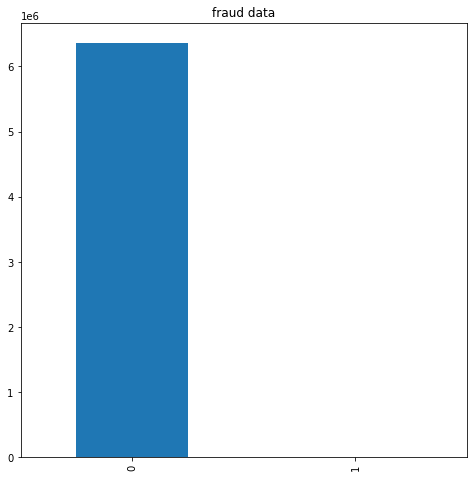

In [19]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
paysim.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [20]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\osile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

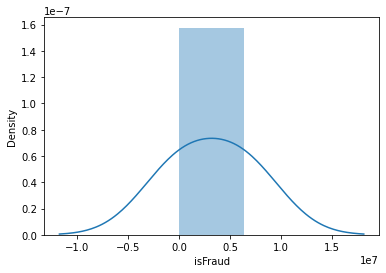

In [21]:
sns.distplot(data.isFraud.value_counts())


In [22]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

<AxesSubplot:>

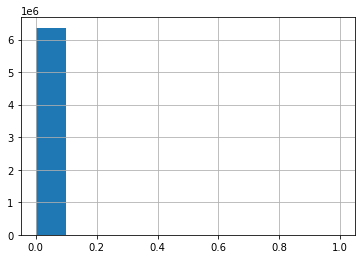

In [23]:
# Your response here
paysim['isFlaggedFraud'].hist()
#the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

There is some correlation between fields. let's Drop 'oldbalanceDest','oldbalanceOrig'


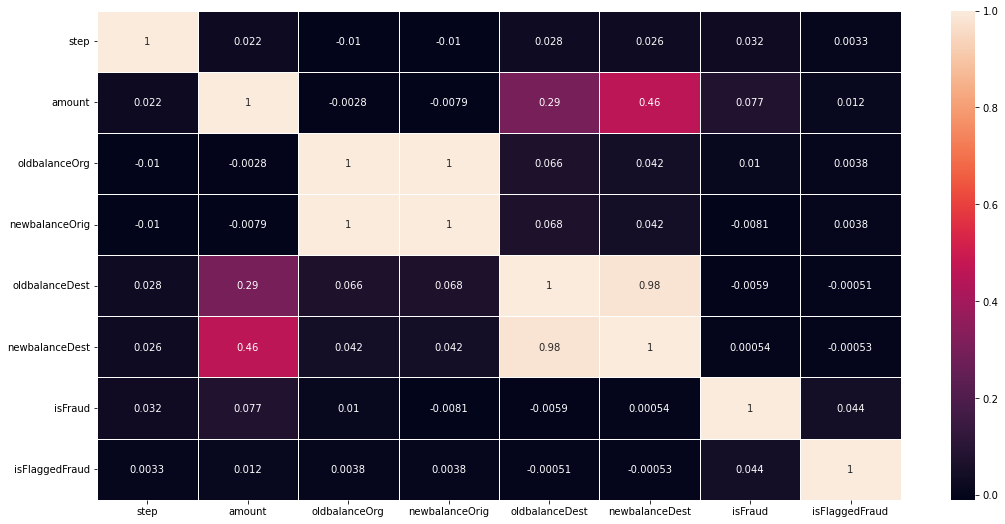

In [24]:
# Your code here
# Check for excessive correlation
plt.figure(figsize=(18,9))
sns.heatmap(paysim.corr(), annot=True, linewidth=0.5)
print("There is some correlation between fields. let's Drop 'oldbalanceDest','oldbalanceOrig'")
paysim.drop(['oldbalanceDest','oldbalanceDest','oldbalanceOrg'], axis=1, inplace=True)


<AxesSubplot:>

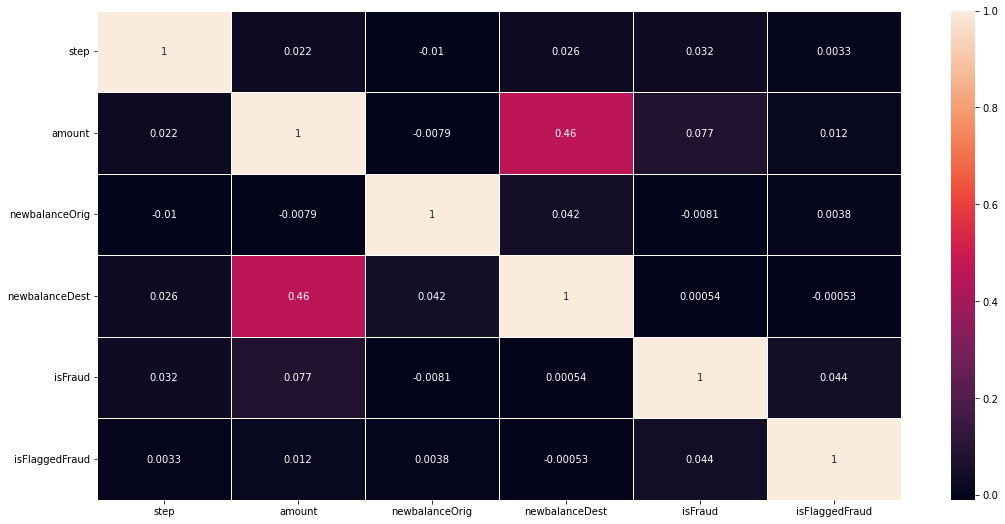

In [25]:
plt.figure(figsize=(18,9))
sns.heatmap(paysim.corr(), annot=True, linewidth=0.5)

In [26]:
# Check for null values
print(paysim.isnull().sum())
print("No null values. Let's move on")

step              0
type              0
amount            0
nameOrig          0
newbalanceOrig    0
nameDest          0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
No null values. Let's move on


In [34]:
import datetime

In [35]:
print("Step data can be the seconds since first record, so if we define a start date time we can use this field to create a scaled date time field")
print("In this case, and after reading description in Kaggle we know that the steps is the amount of hours passed since a certain start point")
# Let's create a new scalled time
start_datetime =  datetime.datetime(2020, 2, 17, 0,00) # Let's use 1st day of bootcamp as startpoint
paysim['datetime'] = paysim.apply(lambda x: start_datetime + datetime.timedelta(hours=x['step']), axis=1)

Step data can be the seconds since first record, so if we define a start date time we can use this field to create a scaled date time field
In this case, and after reading description in Kaggle we know that the steps is the amount of hours passed since a certain start point


In [36]:
paysim.dtypes

step                       int64
type                      object
amount                   float64
nameOrig                  object
newbalanceOrig           float64
nameDest                  object
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
dtype: object

In [37]:
# Create dummies fromm transfer type
dummies = pd.get_dummies(paysim['type'])
paysim_dummies = pd.concat([paysim, dummies], axis=1)

In [38]:
paysim_dummies.dtypes

step                       int64
type                      object
amount                   float64
nameOrig                  object
newbalanceOrig           float64
nameDest                  object
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
CASH_IN                    uint8
CASH_OUT                   uint8
DEBIT                      uint8
PAYMENT                    uint8
TRANSFER                   uint8
dtype: object

In [39]:
# Drop a few columns for a better overview
paysim_dummies.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)

<AxesSubplot:>

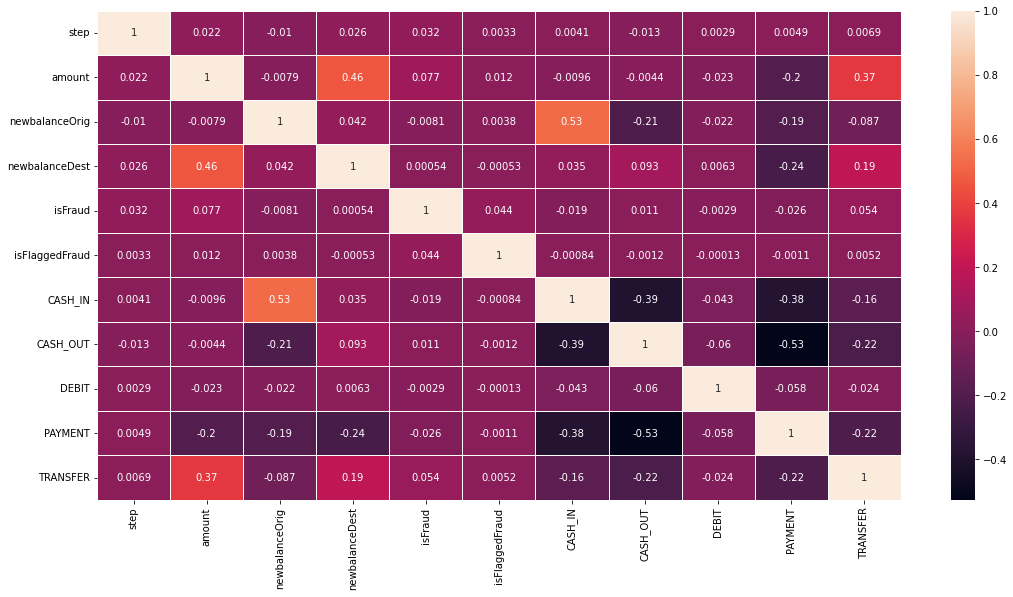

In [40]:
# One last check on the correlation
plt.figure(figsize=(18,9))
sns.heatmap(paysim_dummies.corr(), annot=True, linewidth=0.5)

### Run a logisitc regression classifier and evaluate its accuracy.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [42]:
paysim_dummies['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [43]:
# Deal with scalling
majority = paysim_dummies[paysim_dummies['isFraud'] == 0]
minority = paysim_dummies[paysim_dummies['isFraud'] == 1]
 
# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
paysim_downsampled = pd.concat([majority_downsampled, minority])

paysim_downsampled['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [45]:
# Your code here
y = paysim_downsampled['isFraud']
X = paysim_downsampled.drop(['isFraud','datetime'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13140, 10) (3286, 10) (13140,) (3286,)


In [46]:
# Create and train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Make a prediction
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score

print('precision: ', precision_score(y_test,y_pred))
print('recall:    ', recall_score(y_test, y_pred))
print('f1_score:  ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

precision:  0.6172786177105831
recall:     0.8970495919648462
f1_score:   0.7313203684749232
[[ 807  886]
 [ 164 1429]]


### Now pick a model of your choice and evaluate its accuracy.

In [49]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
# Make a prediction
knn_predict = knn.predict(X_test)

In [51]:
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy_percentage = 100 * knn_accuracy
knn_accuracy_percentage

80.70602556299453

### Which model worked better and how do you know?

In [52]:
# Your response here
print("By the accuracy percentage we can see that the model that works best is the KNN model, even without tunning on the number of clusters the difference is quite big.")

By the accuracy percentage we can see that the model that works best is the KNN model, even without tunning on the number of clusters the difference is quite big.


### Let's use NearMiss method for undersampling and compare the results with previous

In [54]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_nm, y_nm = undersample.fit_resample(X, y)

### And now let's apply SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

### Apply your model on improved data

In [58]:
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size= 0.2)
print(X_train_nm.shape, X_test_nm.shape, y_train_nm.shape, y_test_nm.shape)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size= 0.2)
print(X_train_sm.shape, X_test_sm.shape, y_train_sm.shape, y_test_sm.shape)

(13140, 10) (3286, 10) (13140,) (3286,)
(13140, 10) (3286, 10) (13140,) (3286,)


In [60]:
lr = LogisticRegression()
lr.fit(X_train_nm, y_train_nm)
y_pred_nm = lr.predict(X_test_nm)

In [62]:
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
y_pred_sm = lr.predict(X_test_sm)

### Calculate classification report for imbalanced data to evaluate the models

In [63]:
from imblearn.metrics import classification_report_imbalanced
print('Logistic regression:')
print(classification_report_imbalanced(y_test, y_pred))
print('\nLogistic regression after Near Miss:')
print(classification_report_imbalanced(y_test_nm, y_pred_nm))
print('\nLogistic regression after SMOTE:')
print(classification_report_imbalanced(y_test_sm, y_pred_sm))

Logistic regression:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.48      0.90      0.61      0.65      0.41      1693
          1       0.62      0.90      0.48      0.73      0.65      0.45      1593

avg / total       0.73      0.68      0.69      0.67      0.65      0.43      3286


Logistic regression after Near Miss:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.46      0.91      0.59      0.65      0.40      1630
          1       0.63      0.91      0.46      0.75      0.65      0.44      1656

avg / total       0.73      0.69      0.68      0.67      0.65      0.42      3286


Logistic regression after SMOTE:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.48      0.90      0.61      0.66      0.42      1626
          1       0.64      0.90      0.48      0.75      0.66      0.

### What is your conclusion?

In [ ]:
print('The accuracy for all methods was high, but after resampling (undersampling and oversampling) the spe, geo and iba paramaters increased which means that the accuracy in each class is better')